**导入相关模块**

In [1]:
import seaborn as sns
import pandas as pd
import sklearn.model_selection as skmodel
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.vis_utils import plot_model,model_to_dot

**读取数据**

In [2]:
excel_path='./二分类问题.xlsx'
pain_data = pd.read_excel(excel_path,usecols=[1,2,3,4,5,6,7,8]) 

**查看数据**

In [3]:
pain_data

,CLASS,PLT,CA125,ZXL,ZXLBFB,LB,LBBFB,BDB
0,1,542,210.20,6.93,81.80,0.87,10.30,32.8
1,1,238,438.04,2.96,71.10,0.91,21.70,41.8
2,0,205,1072.00,3.47,65.50,1.28,24.10,35.8
3,1,263,7195.00,3.79,70.90,1.21,22.70,43.4
4,0,136,367.00,1.36,52.70,0.89,34.50,32.8
...,...,...,...,...,...,...,...,...
210,1,524,843.60,4.67,82.50,0.67,11.70,40.4
211,0,294,1262.00,6.60,71.70,1.88,20.40,45.0
212,0,338,31.77,4.13,59.24,2.21,31.64,42.6
213,1,403,775.80,5.76,86.21,0.56,8.42,30.6


**CLASS是标签，后7列是数据。将后7列提取出来**

In [4]:
PLT=pain_data.values[:,1].reshape(215,1)
CA125=pain_data.values[:,2].reshape(215,1)
ZXL=pain_data.values[:,3].reshape(215,1)
ZXLBFB=pain_data.values[:,4].reshape(215,1)
LB=pain_data.values[:,5].reshape(215,1)
LBBFB=pain_data.values[:,6].reshape(215,1)
BDB=pain_data.values[:,7].reshape(215,1)
pain_data.data=np.hstack((PLT,CA125,ZXL,ZXLBFB,LB,LBBFB,BDB))

C:\Users\Bunny\AppData\Local\Temp/ipykernel_6828/1456628575.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pain_data.data=np.hstack((PLT,CA125,ZXL,ZXLBFB,LB,LBBFB,BDB))


**查看数据**

In [5]:
pain_data.data

array([[5.4200e+02, 2.1020e+02, 6.9300e+00, ..., 8.7000e-01, 1.0300e+01,
        3.2800e+01],
       [2.3800e+02, 4.3804e+02, 2.9600e+00, ..., 9.1000e-01, 2.1700e+01,
        4.1800e+01],
       [2.0500e+02, 1.0720e+03, 3.4700e+00, ..., 1.2800e+00, 2.4100e+01,
        3.5800e+01],
       ...,
       [3.3800e+02, 3.1770e+01, 4.1300e+00, ..., 2.2100e+00, 3.1640e+01,
        4.2600e+01],
       [4.0300e+02, 7.7580e+02, 5.7600e+00, ..., 5.6000e-01, 8.4200e+00,
        3.0600e+01],
       [1.7200e+02, 7.9170e+02, 4.8800e+00, ..., 1.5500e+00, 2.2400e+01,
        4.3000e+01]])

**画出PLT、CA125、ZXL、ZXLBFB之间的散点图**

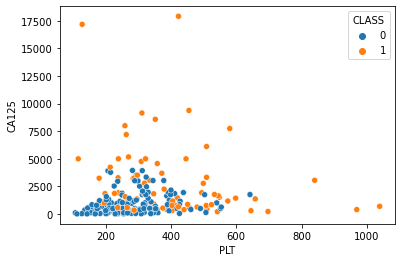

In [6]:
fig1=sns.scatterplot(x='PLT', y='CA125', data=pain_data, hue='CLASS')
scatter_fig1 = fig1.get_figure()
scatter_fig1.savefig('./pictures/PLT_CA125.jpg', dpi = 400)

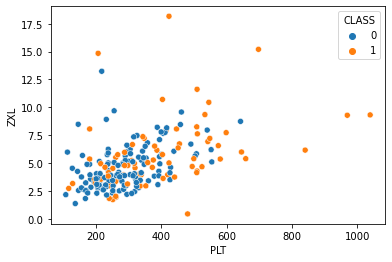

In [7]:
fig2=sns.scatterplot(x='PLT', y='ZXL', data=pain_data, hue='CLASS')
scatter_fig2 = fig2.get_figure()
scatter_fig2.savefig('./pictures/PLT_ZXL.jpg', dpi = 400)

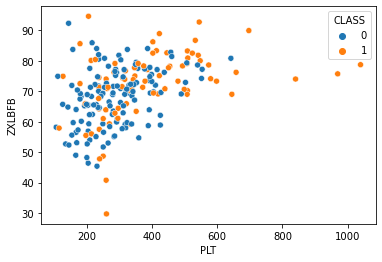

In [8]:
fig3=sns.scatterplot(x='PLT', y='ZXLBFB', data=pain_data, hue='CLASS')
scatter_fig3 = fig3.get_figure()
scatter_fig3.savefig('./pictures/PLT_ZXLBFB.jpg', dpi = 400)

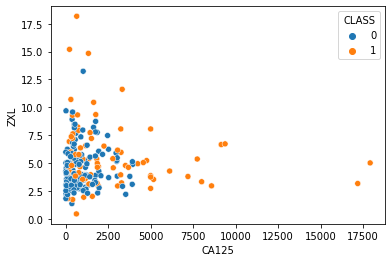

In [9]:
fig4=sns.scatterplot(x='CA125', y='ZXL', data=pain_data, hue='CLASS')
scatter_fig4 = fig4.get_figure()
scatter_fig4.savefig('./pictures/CA125_ZXL.jpg', dpi = 400)

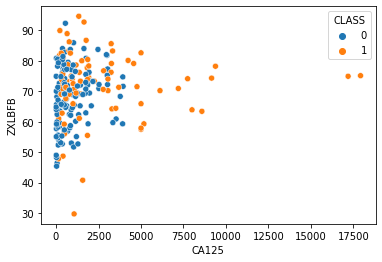

In [10]:
fig5=sns.scatterplot(x='CA125', y='ZXLBFB', data=pain_data, hue='CLASS')
scatter_fig5 = fig5.get_figure()
scatter_fig5.savefig('./pictures/CA125_ZXLBFB.jpg', dpi = 400)

**将数据进行归一化处理（归一化到0-1）并保存到“归一化后数据”的表格里**

In [11]:
std=MinMaxScaler()
std.fit(pain_data.data)
pain_data_minmax=std.transform(pain_data.data)
dataframe = pd.DataFrame({'CLASS':pain_data.values[:,0],'PLT':pain_data_minmax[:,0],'CA125':pain_data_minmax[:,1],'ZXL':pain_data_minmax[:,2],'ZXLBFB':pain_data_minmax[:,3],'LB':pain_data_minmax[:,4],'LBBFB':pain_data_minmax[:,5],'BDB':pain_data_minmax[:,6]})
dataframe.to_csv("归一化后数据.csv",sep=',')

**查看归一化后的数据**

In [12]:
pain_data_minmax

array([[0.4667382 , 0.01128   , 0.36619718, ..., 0.14      , 0.1220375 ,
        0.61099366],
       [0.14055794, 0.02400295, 0.14253521, ..., 0.15142857, 0.32366466,
        0.8012685 ],
       [0.10515021, 0.05940428, 0.17126761, ..., 0.25714286, 0.36611249,
        0.6744186 ],
       ...,
       [0.24785408, 0.00131619, 0.2084507 , ..., 0.52285714, 0.4994694 ,
        0.81818182],
       [0.31759657, 0.042864  , 0.30028169, ..., 0.05142857, 0.0887867 ,
        0.56448203],
       [0.06974249, 0.04375188, 0.25070423, ..., 0.33428571, 0.33604528,
        0.82663848]])

**读取归一化后数据**

In [13]:
data = pd.read_csv('归一化后数据.csv')

**画出PLT、CA125、ZXL、ZXLBFB之间的归一化后数据的散点图**

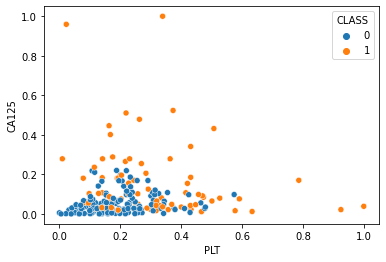

In [14]:
fig11=sns.scatterplot(x='PLT', y='CA125', data=data, hue='CLASS')
scatter_fig11 = fig11.get_figure()
scatter_fig11.savefig('./pictures/PLT_CA125_normalization.jpg', dpi = 400)

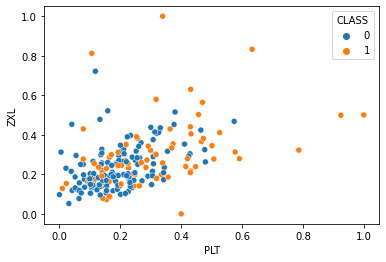

In [15]:
fig22=sns.scatterplot(x='PLT', y='ZXL', data=data, hue='CLASS')
scatter_fig22 = fig22.get_figure()
scatter_fig22.savefig('./pictures/PLT_ZXL_normalization.jpg', dpi = 400)

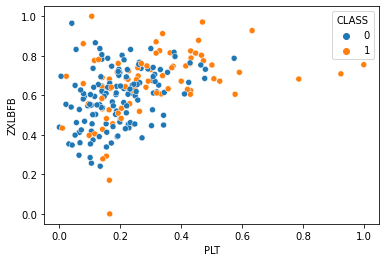

In [16]:
fig33=sns.scatterplot(x='PLT', y='ZXLBFB', data=data, hue='CLASS')
scatter_fig33 = fig33.get_figure()
scatter_fig33.savefig('./pictures/PLT_ZXLBFB_normalization.jpg', dpi = 400)

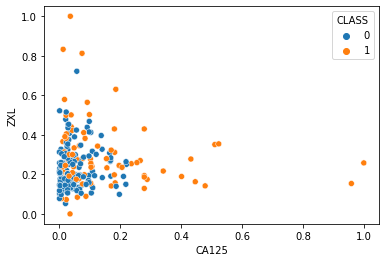

In [17]:
fig44=sns.scatterplot(x='CA125', y='ZXL', data=data, hue='CLASS')
scatter_fig44 = fig44.get_figure()
scatter_fig44.savefig('./pictures/CA125_ZXL_normalization.jpg', dpi = 400)

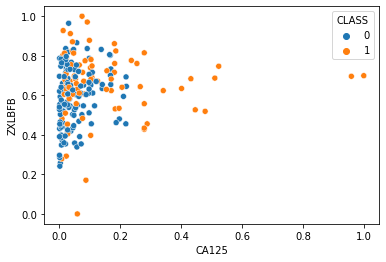

In [18]:
fig55=sns.scatterplot(x='CA125', y='ZXLBFB', data=data, hue='CLASS')
scatter_fig55 = fig55.get_figure()
scatter_fig55.savefig('./pictures/CA125_ZXLBFB_normalization.jpg', dpi = 400)

**将所有数据中随机选取80%进行训练**

In [19]:
x_train,_, y_train, _ = skmodel.train_test_split(pain_data_minmax, pain_data.CLASS,random_state=1,train_size=0.8)

**查看训练集数据和标签**

In [20]:
x_train

array([[0.10515021, 0.03751438, 0.13126761, ..., 0.36571429, 0.54474708,
        0.83086681],
       [0.43133047, 0.18527122, 0.63042254, ..., 0.31142857, 0.12592855,
        0.74841438],
       [0.04184549, 0.00674008, 0.11887324, ..., 0.29714286, 0.45702158,
        0.72093023],
       ...,
       [0.14055794, 0.18314924, 0.1571831 , ..., 0.27428571, 0.41209763,
        0.75264271],
       [0.35729614, 0.02163862, 0.18647887, ..., 0.21714286, 0.321896  ,
        0.51374207],
       [0.09334764, 0.03482281, 0.16169014, ..., 0.29142857, 0.42978422,
        0.82241015]])

In [21]:
y_train

47     0
202    1
27     0
58     0
40     1
      ..
203    0
137    0
72     1
140    1
37     0
Name: CLASS, Length: 172, dtype: int64

**定义评价指标**

In [22]:
#精确率评价指标
def metric_precision(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    return precision
#召回率评价指标
def metric_recall(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    recall=TP/(TP+FN)
    return recall

#特异性评价指标
def metric_specificity(y_true,y_pred): 
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    specificity=TN/(TN+FP)
    return specificity

#F1-score评价指标
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

**建立模型**

In [23]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(7,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

**模型的网络结构**

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9

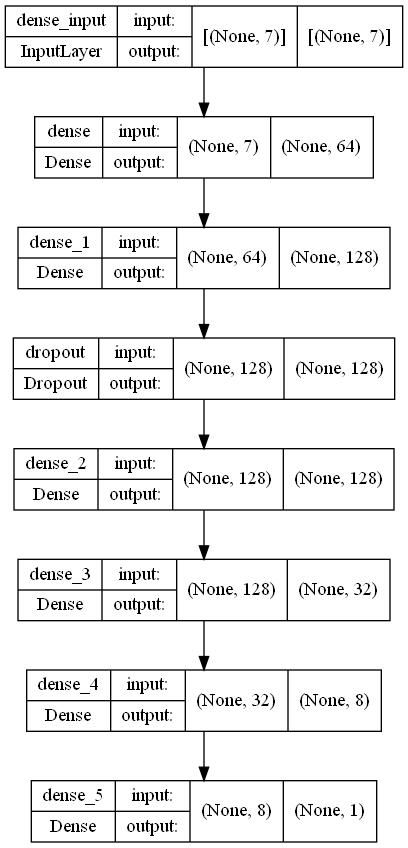

In [25]:
keras.utils.plot_model(model, to_file='./pictures/model.jpg', show_shapes=True)

**开始训练**

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',
            metric_precision,
            metric_recall,
            metric_specificity,
            metric_F1score])
history=model.fit(x_train,y_train,epochs=1000,batch_size=64)

Epoch 1/1000
3/3 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5930 - metric_precision: nan - metric_recall: 0.0159 - metric_specificity: 0.9767 - metric_F1score: nan  
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.6047 - metric_precision: nan - metric_recall: 0.0000e+00 - metric_specificity: 1.0000 - metric_F1score: nan
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.6047 - metric_precision: nan - metric_recall: 0.0000e+00 - metric_specificity: 1.0000 - metric_F1score: nan
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6047 - metric_precision: nan - metric_recall: 0.0000e+00 - metric_specificity: 1.0000 - metric_F1score: nan
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.6047 - metric_precision: nan - metric_recall: 0.0000e+00 - metric_specificity: 1.0000 - metric_F1score: n

3/3 [==============================] - 0s 4ms/step - loss: 0.5227 - accuracy: 0.7442 - metric_precision: 0.7836 - metric_recall: 0.5494 - metric_specificity: 0.8953 - metric_F1score: 0.6087
Epoch 42/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7558 - metric_precision: 0.7650 - metric_recall: 0.5570 - metric_specificity: 0.8706 - metric_F1score: 0.6333
Epoch 43/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7965 - metric_precision: 0.8833 - metric_recall: 0.5800 - metric_specificity: 0.9542 - metric_F1score: 0.6977
Epoch 44/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7558 - metric_precision: 0.7212 - metric_recall: 0.5165 - metric_specificity: 0.8863 - metric_F1score: 0.5939
Epoch 45/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7558 - metric_precision: 0.8004 - metric_recall: 0.5218 - metric_specificity: 0.9099 - metric_F1score: 0

3/3 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7791 - metric_precision: 0.8770 - metric_recall: 0.5403 - metric_specificity: 0.9465 - metric_F1score: 0.6571
Epoch 82/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7791 - metric_precision: 0.8442 - metric_recall: 0.5615 - metric_specificity: 0.9296 - metric_F1score: 0.6718
Epoch 83/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7674 - metric_precision: 0.8333 - metric_recall: 0.5833 - metric_specificity: 0.9034 - metric_F1score: 0.6559
Epoch 84/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7791 - metric_precision: 0.8522 - metric_recall: 0.5298 - metric_specificity: 0.9410 - metric_F1score: 0.6530
Epoch 85/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7791 - metric_precision: 0.8587 - metric_recall: 0.5387 - metric_specificity: 0.9380 - metric_F1score: 0

3/3 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7674 - metric_precision: 0.8471 - metric_recall: 0.5369 - metric_specificity: 0.9262 - metric_F1score: 0.6484
Epoch 122/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7965 - metric_precision: 0.8821 - metric_recall: 0.5495 - metric_specificity: 0.9528 - metric_F1score: 0.6766
Epoch 123/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.8081 - metric_precision: 0.9444 - metric_recall: 0.5697 - metric_specificity: 0.9770 - metric_F1score: 0.7019
Epoch 124/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7791 - metric_precision: 0.8743 - metric_recall: 0.5416 - metric_specificity: 0.9282 - metric_F1score: 0.6506
Epoch 125/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7965 - metric_precision: 0.8490 - metric_recall: 0.5667 - metric_specificity: 0.9480 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7907 - metric_precision: 0.9091 - metric_recall: 0.5338 - metric_specificity: 0.9558 - metric_F1score: 0.6632
Epoch 162/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7674 - metric_precision: 0.8232 - metric_recall: 0.5500 - metric_specificity: 0.9086 - metric_F1score: 0.6411
Epoch 163/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8081 - metric_precision: 0.9514 - metric_recall: 0.5462 - metric_specificity: 0.9762 - metric_F1score: 0.6939
Epoch 164/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7791 - metric_precision: 0.8154 - metric_recall: 0.5360 - metric_specificity: 0.9322 - metric_F1score: 0.6406
Epoch 165/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7849 - metric_precision: 0.8808 - metric_recall: 0.5400 - metric_specificity: 0.9444 - metric_F1scor

3/3 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8023 - metric_precision: 0.9216 - metric_recall: 0.5636 - metric_specificity: 0.9683 - metric_F1score: 0.6944
Epoch 202/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8081 - metric_precision: 0.8528 - metric_recall: 0.5272 - metric_specificity: 0.9602 - metric_F1score: 0.6476
Epoch 203/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7965 - metric_precision: 0.9286 - metric_recall: 0.5325 - metric_specificity: 0.9762 - metric_F1score: 0.6758
Epoch 204/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8081 - metric_precision: 0.9155 - metric_recall: 0.5822 - metric_specificity: 0.9615 - metric_F1score: 0.7084
Epoch 205/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7674 - metric_precision: 0.8947 - metric_recall: 0.5124 - metric_specificity: 0.9500 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8140 - metric_precision: 0.8860 - metric_recall: 0.6169 - metric_specificity: 0.9489 - metric_F1score: 0.7193
Epoch 242/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8256 - metric_precision: 0.9375 - metric_recall: 0.6130 - metric_specificity: 0.9615 - metric_F1score: 0.7326
Epoch 243/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8314 - metric_precision: 1.0000 - metric_recall: 0.5758 - metric_specificity: 1.0000 - metric_F1score: 0.7278
Epoch 244/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3593 - accuracy: 0.8488 - metric_precision: 0.9619 - metric_recall: 0.6455 - metric_specificity: 0.9829 - metric_F1score: 0.7714
Epoch 245/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8256 - metric_precision: 0.9143 - metric_recall: 0.6398 - metric_specificity: 0.9623 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8372 - metric_precision: 0.9050 - metric_recall: 0.6657 - metric_specificity: 0.9520 - metric_F1score: 0.7670
Epoch 282/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8372 - metric_precision: 0.9412 - metric_recall: 0.6310 - metric_specificity: 0.9773 - metric_F1score: 0.7497
Epoch 283/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8488 - metric_precision: 0.9123 - metric_recall: 0.6972 - metric_specificity: 0.9582 - metric_F1score: 0.7870
Epoch 284/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8023 - metric_precision: 0.9000 - metric_recall: 0.5889 - metric_specificity: 0.9524 - metric_F1score: 0.6869
Epoch 285/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8372 - metric_precision: 0.9471 - metric_recall: 0.6061 - metric_specificity: 0.9739 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8314 - metric_precision: 0.8947 - metric_recall: 0.6690 - metric_specificity: 0.9387 - metric_F1score: 0.7545
Epoch 322/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8663 - metric_precision: 0.9188 - metric_recall: 0.7338 - metric_specificity: 0.9564 - metric_F1score: 0.8133
Epoch 323/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8430 - metric_precision: 0.8684 - metric_recall: 0.7065 - metric_specificity: 0.9257 - metric_F1score: 0.7746
Epoch 324/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8430 - metric_precision: 0.8889 - metric_recall: 0.7131 - metric_specificity: 0.9255 - metric_F1score: 0.7800
Epoch 325/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8779 - metric_precision: 0.9279 - metric_recall: 0.7645 - metric_specificity: 0.9704 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8779 - metric_precision: 0.9429 - metric_recall: 0.7354 - metric_specificity: 0.9708 - metric_F1score: 0.8237
Epoch 362/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.8663 - metric_precision: 0.8889 - metric_recall: 0.7507 - metric_specificity: 0.9321 - metric_F1score: 0.8111
Epoch 363/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8837 - metric_precision: 0.9558 - metric_recall: 0.7427 - metric_specificity: 0.9727 - metric_F1score: 0.8338
Epoch 364/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8605 - metric_precision: 0.8702 - metric_recall: 0.7711 - metric_specificity: 0.9244 - metric_F1score: 0.8159
Epoch 365/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3744 - accuracy: 0.8256 - metric_precision: 0.8765 - metric_recall: 0.7194 - metric_specificity: 0.9206 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8779 - metric_precision: 0.8913 - metric_recall: 0.7780 - metric_specificity: 0.9369 - metric_F1score: 0.8303
Epoch 402/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8198 - metric_precision: 0.8407 - metric_recall: 0.7293 - metric_specificity: 0.8994 - metric_F1score: 0.7549
Epoch 403/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8721 - metric_precision: 1.0000 - metric_recall: 0.6747 - metric_specificity: 1.0000 - metric_F1score: 0.8029
Epoch 404/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.8779 - metric_precision: 0.9177 - metric_recall: 0.7579 - metric_specificity: 0.9520 - metric_F1score: 0.8269
Epoch 405/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8430 - metric_precision: 0.9020 - metric_recall: 0.6844 - metric_specificity: 0.9389 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8488 - metric_precision: 0.9222 - metric_recall: 0.7037 - metric_specificity: 0.9431 - metric_F1score: 0.7611
Epoch 442/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.8953 - metric_precision: 0.9375 - metric_recall: 0.7707 - metric_specificity: 0.9771 - metric_F1score: 0.8431
Epoch 443/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2433 - accuracy: 0.8895 - metric_precision: 0.9300 - metric_recall: 0.7796 - metric_specificity: 0.9620 - metric_F1score: 0.8472
Epoch 444/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8837 - metric_precision: 0.8743 - metric_recall: 0.8227 - metric_specificity: 0.9226 - metric_F1score: 0.8433
Epoch 445/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.8837 - metric_precision: 0.8960 - metric_recall: 0.7913 - metric_specificity: 0.9480 - metric_F1scor

3/3 [==============================] - 0s 1ms/step - loss: 0.2082 - accuracy: 0.9186 - metric_precision: 0.9467 - metric_recall: 0.8581 - metric_specificity: 0.9683 - metric_F1score: 0.8943
Epoch 482/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9186 - metric_precision: 0.9304 - metric_recall: 0.8445 - metric_specificity: 0.9564 - metric_F1score: 0.8849
Epoch 483/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.8895 - metric_precision: 0.9416 - metric_recall: 0.7748 - metric_specificity: 0.9648 - metric_F1score: 0.8430
Epoch 484/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8488 - metric_precision: 0.8261 - metric_recall: 0.8106 - metric_specificity: 0.8688 - metric_F1score: 0.8051
Epoch 485/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2814 - accuracy: 0.8895 - metric_precision: 0.9625 - metric_recall: 0.7587 - metric_specificity: 0.9782 - metric_F1scor

3/3 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9244 - metric_precision: 0.9548 - metric_recall: 0.8507 - metric_specificity: 0.9696 - metric_F1score: 0.8957
Epoch 522/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.9302 - metric_precision: 0.9201 - metric_recall: 0.9210 - metric_specificity: 0.9435 - metric_F1score: 0.9172
Epoch 523/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8372 - metric_precision: 0.8889 - metric_recall: 0.7397 - metric_specificity: 0.9127 - metric_F1score: 0.7695
Epoch 524/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.2076 - accuracy: 0.9186 - metric_precision: 0.9710 - metric_recall: 0.8333 - metric_specificity: 0.9833 - metric_F1score: 0.8947
Epoch 525/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9186 - metric_precision: 0.9175 - metric_recall: 0.8781 - metric_specificity: 0.9505 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9128 - metric_precision: 0.9599 - metric_recall: 0.7984 - metric_specificity: 0.9741 - metric_F1score: 0.8578
Epoch 562/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8605 - metric_precision: 0.8318 - metric_recall: 0.8557 - metric_specificity: 0.8687 - metric_F1score: 0.8202
Epoch 563/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.8895 - metric_precision: 0.9421 - metric_recall: 0.7662 - metric_specificity: 0.9496 - metric_F1score: 0.8386
Epoch 564/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9244 - metric_precision: 0.9841 - metric_recall: 0.8340 - metric_specificity: 0.9919 - metric_F1score: 0.9012
Epoch 565/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9419 - metric_precision: 0.9697 - metric_recall: 0.8843 - metric_specificity: 0.9833 - metric_F1scor

3/3 [==============================] - 0s 1ms/step - loss: 0.1629 - accuracy: 0.9302 - metric_precision: 0.9353 - metric_recall: 0.8890 - metric_specificity: 0.9566 - metric_F1score: 0.9083
Epoch 602/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9419 - metric_precision: 0.9505 - metric_recall: 0.8929 - metric_specificity: 0.9705 - metric_F1score: 0.9207
Epoch 603/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9186 - metric_precision: 0.9253 - metric_recall: 0.8846 - metric_specificity: 0.9459 - metric_F1score: 0.8904
Epoch 604/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9419 - metric_precision: 0.9652 - metric_recall: 0.8828 - metric_specificity: 0.9787 - metric_F1score: 0.9211
Epoch 605/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9419 - metric_precision: 0.9610 - metric_recall: 0.8912 - metric_specificity: 0.9734 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9186 - metric_precision: 0.9426 - metric_recall: 0.8514 - metric_specificity: 0.9677 - metric_F1score: 0.8894
Epoch 642/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9419 - metric_precision: 0.9257 - metric_recall: 0.9011 - metric_specificity: 0.9605 - metric_F1score: 0.9112
Epoch 643/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9477 - metric_precision: 0.9733 - metric_recall: 0.8946 - metric_specificity: 0.9829 - metric_F1score: 0.9315
Epoch 644/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9419 - metric_precision: 0.9330 - metric_recall: 0.9223 - metric_specificity: 0.9554 - metric_F1score: 0.9231
Epoch 645/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8721 - metric_precision: 0.9167 - metric_recall: 0.7694 - metric_specificity: 0.9545 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9360 - metric_precision: 0.9329 - metric_recall: 0.8923 - metric_specificity: 0.9686 - metric_F1score: 0.9117
Epoch 682/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9593 - metric_precision: 0.9602 - metric_recall: 0.9408 - metric_specificity: 0.9746 - metric_F1score: 0.9492
Epoch 683/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9709 - metric_precision: 0.9697 - metric_recall: 0.9615 - metric_specificity: 0.9722 - metric_F1score: 0.9637
Epoch 684/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9360 - metric_precision: 0.9370 - metric_recall: 0.9048 - metric_specificity: 0.9522 - metric_F1score: 0.9166
Epoch 685/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9651 - metric_precision: 0.9885 - metric_recall: 0.9175 - metric_specificity: 0.9907 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9767 - metric_precision: 1.0000 - metric_recall: 0.9378 - metric_specificity: 1.0000 - metric_F1score: 0.9678
Epoch 722/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9535 - metric_precision: 0.9861 - metric_recall: 0.9125 - metric_specificity: 0.9905 - metric_F1score: 0.9465
Epoch 723/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9709 - metric_precision: 0.9848 - metric_recall: 0.9463 - metric_specificity: 0.9919 - metric_F1score: 0.9650
Epoch 724/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9593 - metric_precision: 0.9704 - metric_recall: 0.9180 - metric_specificity: 0.9777 - metric_F1score: 0.9407
Epoch 725/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9302 - metric_precision: 0.9286 - metric_recall: 0.9240 - metric_specificity: 0.9524 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9477 - metric_precision: 0.9722 - metric_recall: 0.9013 - metric_specificity: 0.9826 - metric_F1score: 0.9336
Epoch 762/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9419 - metric_precision: 0.9249 - metric_recall: 0.9007 - metric_specificity: 0.9605 - metric_F1score: 0.9117
Epoch 763/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9302 - metric_precision: 0.9430 - metric_recall: 0.8881 - metric_specificity: 0.9615 - metric_F1score: 0.9118
Epoch 764/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9651 - metric_precision: 0.9600 - metric_recall: 0.9577 - metric_specificity: 0.9762 - metric_F1score: 0.9568
Epoch 765/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.9709 - metric_precision: 0.9583 - metric_recall: 0.9630 - metric_specificity: 0.9778 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9709 - metric_precision: 0.9583 - metric_recall: 0.9479 - metric_specificity: 0.9812 - metric_F1score: 0.9530
Epoch 802/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9477 - metric_precision: 0.9365 - metric_recall: 0.9411 - metric_specificity: 0.9506 - metric_F1score: 0.9339
Epoch 803/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9535 - metric_precision: 0.9682 - metric_recall: 0.9139 - metric_specificity: 0.9778 - metric_F1score: 0.9399
Epoch 804/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9535 - metric_precision: 0.9600 - metric_recall: 0.9250 - metric_specificity: 0.9750 - metric_F1score: 0.9414
Epoch 805/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.9477 - metric_precision: 0.9397 - metric_recall: 0.9353 - metric_specificity: 0.9621 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.1378 - accuracy: 0.9186 - metric_precision: 0.9359 - metric_recall: 0.8830 - metric_specificity: 0.9612 - metric_F1score: 0.8997
Epoch 842/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.9884 - metric_precision: 0.9778 - metric_recall: 0.9881 - metric_specificity: 0.9889 - metric_F1score: 0.9824
Epoch 843/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9884 - metric_precision: 1.0000 - metric_recall: 0.9661 - metric_specificity: 1.0000 - metric_F1score: 0.9825
Epoch 844/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9651 - metric_precision: 0.9744 - metric_recall: 0.9276 - metric_specificity: 0.9829 - metric_F1score: 0.9489
Epoch 845/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9244 - metric_precision: 0.9398 - metric_recall: 0.8754 - metric_specificity: 0.9501 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9767 - metric_precision: 1.0000 - metric_recall: 0.9402 - metric_specificity: 1.0000 - metric_F1score: 0.9690
Epoch 882/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9826 - metric_precision: 1.0000 - metric_recall: 0.9643 - metric_specificity: 1.0000 - metric_F1score: 0.9811
Epoch 883/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9244 - metric_precision: 0.9570 - metric_recall: 0.8312 - metric_specificity: 0.9619 - metric_F1score: 0.8733
Epoch 884/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9186 - metric_precision: 0.8664 - metric_recall: 0.9462 - metric_specificity: 0.9149 - metric_F1score: 0.8964
Epoch 885/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9186 - metric_precision: 0.9265 - metric_recall: 0.8715 - metric_specificity: 0.9522 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9826 - metric_precision: 0.9697 - metric_recall: 0.9762 - metric_specificity: 0.9902 - metric_F1score: 0.9718
Epoch 922/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9709 - metric_precision: 1.0000 - metric_recall: 0.9353 - metric_specificity: 1.0000 - metric_F1score: 0.9659
Epoch 923/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8779 - metric_precision: 0.8389 - metric_recall: 0.8800 - metric_specificity: 0.8643 - metric_F1score: 0.8428
Epoch 924/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9360 - metric_precision: 0.9697 - metric_recall: 0.8682 - metric_specificity: 0.9845 - metric_F1score: 0.9066
Epoch 925/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9767 - metric_precision: 0.9872 - metric_recall: 0.9510 - metric_specificity: 0.9915 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9767 - metric_precision: 0.9754 - metric_recall: 0.9654 - metric_specificity: 0.9818 - metric_F1score: 0.9698
Epoch 962/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9767 - metric_precision: 0.9861 - metric_recall: 0.9563 - metric_specificity: 0.9919 - metric_F1score: 0.9703
Epoch 963/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9884 - metric_precision: 1.0000 - metric_recall: 0.9738 - metric_specificity: 1.0000 - metric_F1score: 0.9866
Epoch 964/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9826 - metric_precision: 0.9762 - metric_recall: 0.9762 - metric_specificity: 0.9892 - metric_F1score: 0.9753
Epoch 965/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9651 - metric_precision: 0.9649 - metric_recall: 0.9491 - metric_specificity: 0.9753 - metric_F1scor

**绘制训练过程中各评价指标和loss值的变化图像**

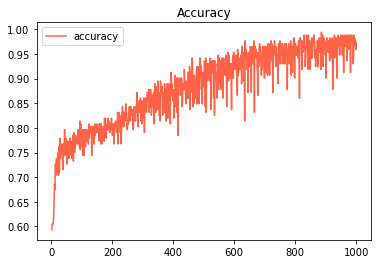

In [27]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.title('Accuracy')
plt.plot(epochs, acc, 'tomato', label='accuracy')
plt.legend()
plt.savefig('./pictures/Accuracy.jpg')
plt.show()

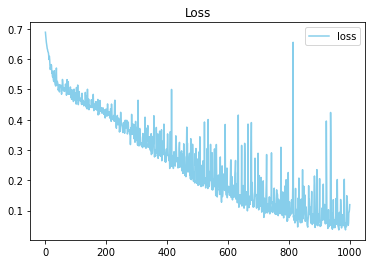

In [28]:
loss = history.history['loss']
plt.title('Loss')
plt.plot(epochs, loss, 'skyblue', label='loss')
plt.legend()
plt.savefig('./pictures/Loss.jpg')
plt.show()

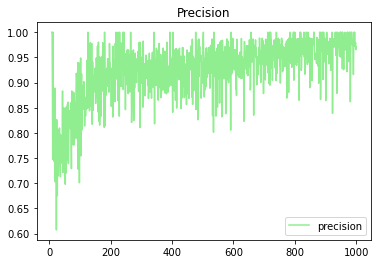

In [29]:
precision = history.history['metric_precision']
plt.title('Precision')
plt.plot(epochs, precision, 'lightgreen', label='precision')
plt.legend()
plt.savefig('./pictures/Precision.jpg')
plt.show()

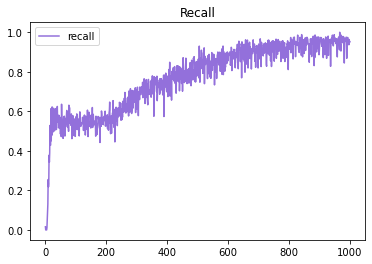

In [30]:
recall = history.history['metric_recall']
plt.title('Recall')
plt.plot(epochs, recall, 'mediumpurple', label='recall')
plt.legend()
plt.savefig('./pictures/Recall.jpg')
plt.show()

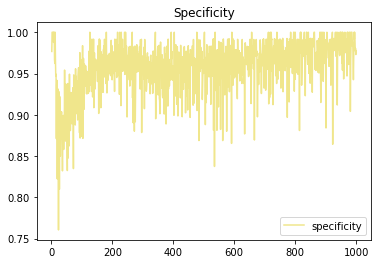

In [31]:
specificity = history.history['metric_specificity']
plt.title('Specificity')
plt.plot(epochs, specificity, 'khaki', label='specificity')
plt.legend()
plt.savefig('./pictures/Specificity.jpg')
plt.show()

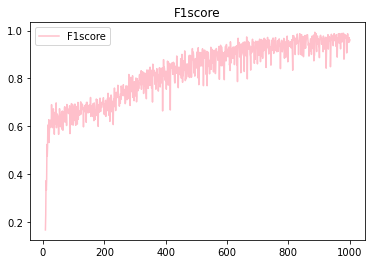

In [32]:
F1score = history.history['metric_F1score']
plt.title('F1score')
plt.plot(epochs, F1score, 'pink', label='F1score')
plt.legend()
plt.savefig('./pictures/F1score.jpg')
plt.show()

**每训练100次保存运行结果**

In [33]:
for i in range(99,1000):
    if (i+1)%100==0:
        print('loss:',round(history.history['loss'][i], 4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('accuracy:',round(history.history['accuracy'][i], 4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('precision:',round(history.history['metric_precision'][i], 4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('recall:',round(history.history['metric_recall'][i],4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('specificity:',round(history.history['metric_specificity'][i], 4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('F1score:',round(history.history['metric_F1score'][i],4))

loss: 0.4737
loss: 0.4353
loss: 0.3658
loss: 0.2811
loss: 0.2701
loss: 0.165
loss: 0.1218
loss: 0.1067
loss: 0.1088
loss: 0.1196
accuracy: 0.7733
accuracy: 0.7849
accuracy: 0.8488
accuracy: 0.8779
accuracy: 0.8837
accuracy: 0.9302
accuracy: 0.9419
accuracy: 0.9651
accuracy: 0.9535
accuracy: 0.9709
precision: 0.8307
precision: 0.913
precision: 0.9149
precision: 0.9474
precision: 0.903
precision: 0.9658
precision: 0.9538
precision: 1.0
precision: 0.971
precision: 0.971
recall: 0.5406
recall: 0.5306
recall: 0.7078
recall: 0.7246
recall: 0.8077
recall: 0.8551
recall: 0.8991
recall: 0.922
recall: 0.9043
recall: 0.953
specificity: 0.9147
specificity: 0.9487
specificity: 0.9497
specificity: 0.9545
specificity: 0.9506
specificity: 0.9789
specificity: 0.9752
specificity: 1.0
specificity: 0.9845
specificity: 0.9773
F1score: 0.648
F1score: 0.6528
F1score: 0.7828
F1score: 0.8175
F1score: 0.8439
F1score: 0.9046
F1score: 0.9256
F1score: 0.9582
F1score: 0.9309
F1score: 0.9612


**保存模型**

In [34]:
model.save('my_model_80%.h5')